In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)

X = np.linspace(-3, 3, 20).reshape(-1, 1)
y = X[:, 0]**2 + np.random.randn(20) * 1.5

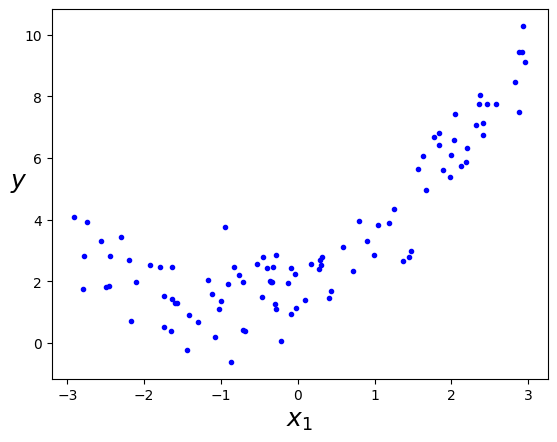

In [18]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [28]:
X_poly = np.c_[np.ones((len(X), 1)), X, X**2]
X_poly[0]

array([1.        , 0.72226021, 0.52165982])

In [29]:
theta = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T.dot(y))
theta

array([[1.92295891],
       [1.03785433],
       [0.50710397]])

In [30]:
y_pred = X_poly.dot(theta)

In [31]:
mse = np.mean((y - y_pred) ** 2)
mse

np.float64(0.7166964973980096)

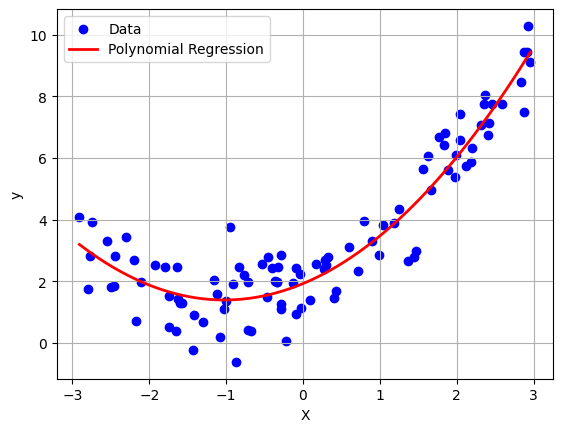

In [46]:
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
X_plot_poly = np.c_[np.ones((len(X_plot), 1)), X_plot, X_plot**2]
y_plot = X_plot_poly.dot(theta)
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X_plot, y_plot, color="red",
         linewidth=2, label="Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_1 = poly_features.fit_transform(X)
X[0]

array([0.72226021])

In [48]:
X_poly_1[0]

array([0.72226021, 0.52165982])

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly_1, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.92295891]), array([[1.03785433, 0.50710397]]))

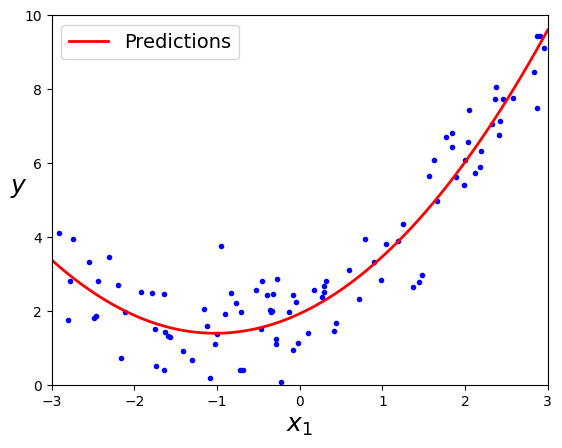

In [57]:
X_new = np.linspace(-3, 3, 200).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

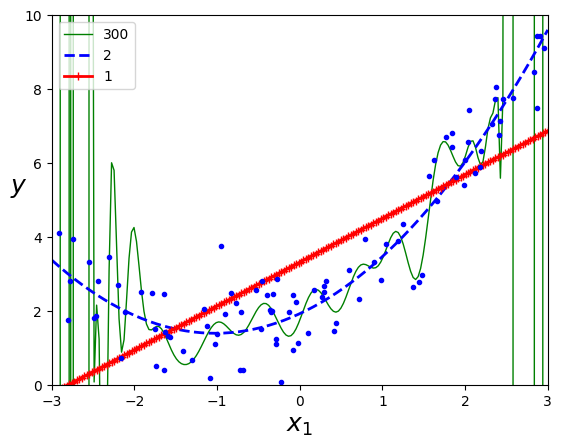

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

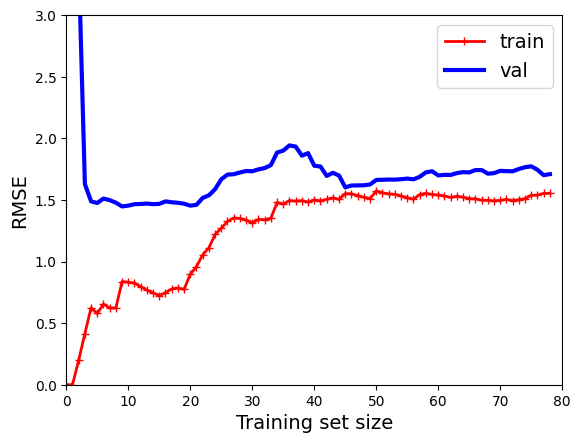

In [63]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()  